# Web Scrapping
#### Project: Extract feedback suggestions from Mutual website
#### Source: feedback.mutual.app
#### Monetization: Non-commercial use
#### Author: Pedro Sanhueza

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:

rows = []
rows_votes = []

for pag in range(7): # '7' because there are 7 pages
    
    url = f'https://feedback.mutual.app/?page={pag+1}&order=popular&filter=all#controls' # url for each page. only change the page number
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    info = soup.find_all('div',{'class':'sInfo'})
    votes= soup.find_all('div',{'class':'sNumbers'})

    for attribute in info:
        row = {}
        row['id'] = attribute.find('a')['href'].split('/')[2]
        row['suggestion'] = attribute.find('a')['href'].split('/')[-1].replace('-',' ').capitalize()
        row['author'] = attribute.find_all('strong')[0].get_text()
        start = attribute.find_all('span')[0].get_text(strip=True).find('(')+1
        end = attribute.find_all('span')[0].get_text(strip=True).find(')')
        row['date_created'] = attribute.find_all('span')[0].get_text(strip=True)[start:end].replace('\'','20')
        row['last_upvoted'] = attribute.find_all('span',{'class':'sLastComment'})[0].get_text(strip=True)[9:]
        row['comments'] = attribute.find_all('span',{'class':'sLabel'})[0].get_text(strip=True)[10:]
        try:
            row['status'] = attribute.find_all('div',{'class':'sLabels'})[0].get_text(strip=True).replace('Pinned','')
        except:
            pass
        rows.append(row)

    for attribute in votes:
        row = {}
        row['votes'] = attribute.find('a').get_text(strip=True)[:-5].replace('K','000')
        rows_votes.append(row)

    for idx,e in enumerate(rows):
        rows_votes[idx].update(e)


In [3]:
data = pd.DataFrame(rows_votes)
data

,votes,id,suggestion,author,date_created,last_upvoted,comments,status
0,1000,161005,See who i have liked,Moses,"19 Feb, 2021",today,72,Planned
1,507,161962,Last onlinerecently active,Moses,"22 Feb, 2021",today,46,In Development
2,444,164928,Filter church activity,Moses,"01 Mar, 2021",today,41,In Development
3,365,177816,Skip a profile save for later,Brian,"11 Apr, 2021",today,35,Under consideration
4,240,161959,Filter children,Moses,"22 Feb, 2021",today,21,In Development
...,...,...,...,...,...,...,...,...
315,1,187811,When i leave a conversation dont jump back to ...,Swaggy Shaggs,"27 May, 2021","27 May, '21",0,Bug
316,1,186869,Add the word peru,Steven Spainhower,"22 May, 2021","22 May, '21",0,Bug
317,1,183884,Yes i already paid for this site but when i go...,Edward Davis,"06 May, 2021","06 May, '21",0,Bug
318,1,183875,Ideal timeline,Sassafrass,"06 May, 2021","06 May, '21",0,Not planned


# Explanatory Data Analysis

In [4]:
import plotly.express as px

In [5]:
data['date_created']

0      19 Feb, 2021
1      22 Feb, 2021
2      01 Mar, 2021
3      11 Apr, 2021
4      22 Feb, 2021
           ...     
315    27 May, 2021
316    22 May, 2021
317    06 May, 2021
318    06 May, 2021
319    04 May, 2021
Name: date_created, Length: 320, dtype: object

In [6]:
# change dtype
data = data.astype({'votes': 'float','comments': 'float'}, copy=True)

# add column with months
data['date_created_month'] = data['date_created'].apply(lambda x: x.split(' ')[1].replace(',',''))
data['date_created_month']=data['date_created_month'].replace({'Fe':'Feb','Ap':'Apr','Ma':'May'})

In [7]:
data['date_created_month'].unique()

array(['Feb', 'Mar', 'Apr', 'Dec', 'May', 'Jul', 'Aug', 'Jun', 'Sep',
       'Oct', 'Nov', 'Jan'], dtype=object)

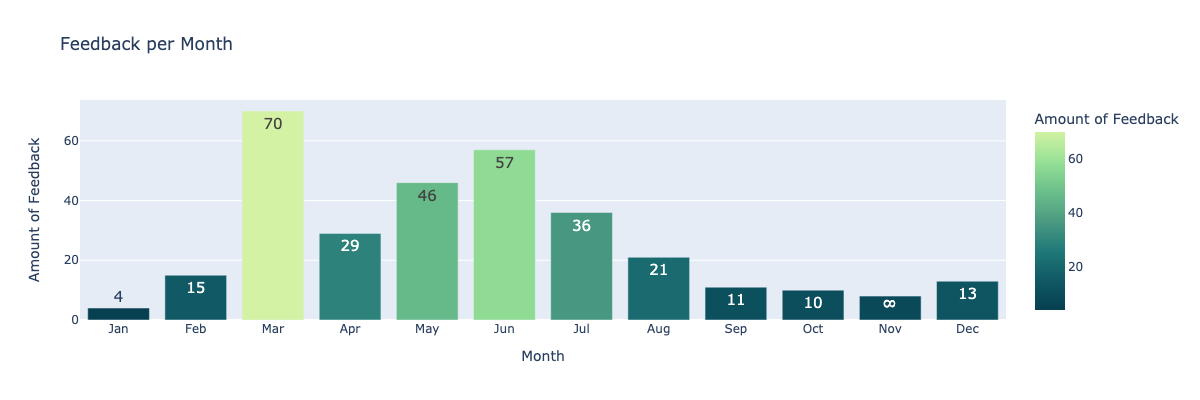

In [8]:
data_month = data['date_created_month'].value_counts().reset_index()
order = {'index':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}

fig = px.bar(
    data_month,
    x='index',
    y='date_created_month',
    color='date_created_month',
    # color_continuous_scale=px.colors.sequential.Viridis,
    color_continuous_scale=str(px.colors.named_colorscales()[15])+'_r',
    category_orders=order,
    width=1200,
    height=400,
    text_auto=True,
    labels={"index":"Month","date_created_month":"Amount of Feedback"},
    title="Feedback per Month"
)

fig.update_traces(textfont_size=15)

fig.show('png')

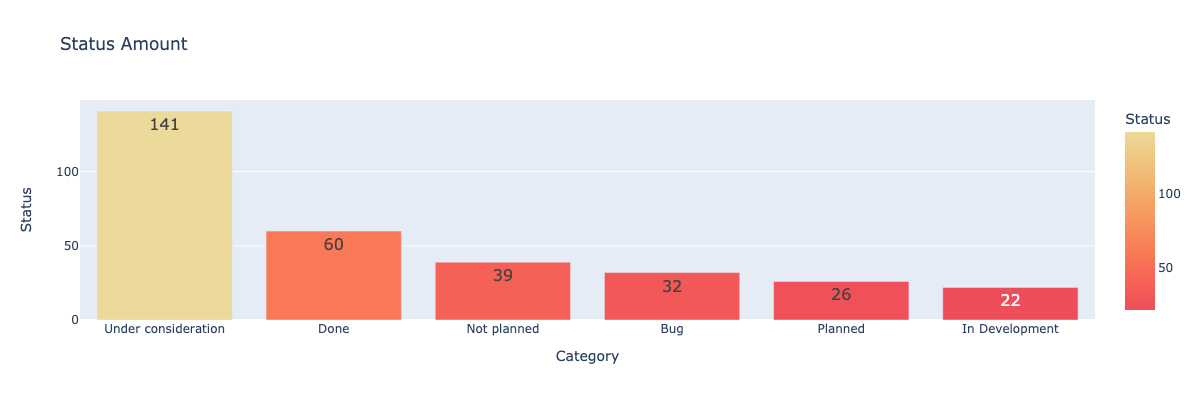

In [9]:

data_status = data['status'].value_counts().reset_index()
x_axis = data_status['index']

fig = px.bar(
    data_status,
    x='index',
    y='status',
    color='status',
    # color_continuous_scale=px.colors.sequential.Viridis,
    color_continuous_scale=str(px.colors.named_colorscales()[27])+'_r',
    width=1200,
    height=400,
    text_auto=True,
    title="Status Amount",
    labels={"index":"Category","status":"Status"},
)

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.update_traces(textfont_size=16)

fig.show('png')

In [10]:
# Top 10 (by vote count) features already implemented:
data[data.status=='Done'][:10].sort_values('votes', ascending=False)

,votes,id,suggestion,author,date_created,last_upvoted,comments,status,date_created_month
14,180.0,157427,Video chat,Moses,"03 Feb, 2021",08 Jul,21.0,Done,Feb
16,162.0,161961,Conversation prompts,Moses,"22 Feb, 2021",09 Jul,24.0,Done,Feb
17,162.0,164962,Hide inactive profiles,Dallin,"02 Mar, 2021",today,2.0,Done,Mar
18,148.0,165319,Higher character count in bio,Qaseem,"02 Mar, 2021",09 Jul,17.0,Done,Mar
21,132.0,164926,Share a profile,Moses,"01 Mar, 2021",today,21.0,Done,Mar
22,129.0,175881,Free trial,Erica,"01 Apr, 2021",2 days ago,25.0,Done,Apr
33,80.0,172181,Filter those that like you,Collin,"21 Mar, 2021",2 days ago,6.0,Done,Mar
46,47.0,184861,List view of people whove liked you,Anonymous,"12 May, 2021",yesterday,7.0,Done,May
90,13.0,194685,See at least 1 person per week,Micah Conover,"29 Jun, 2021",2 days ago,0.0,Done,Jun
91,13.0,192772,Be able to set your location to your home city...,Jacob Coleman,"19 Jun, 2021",09 Jul,0.0,Done,Jun


In [11]:
# Top 10 votes features not done:
data[data.status!='Done'].sort_values('votes', ascending=False)[:10]

,votes,id,suggestion,author,date_created,last_upvoted,comments,status,date_created_month
0,1000.0,161005,See who i have liked,Moses,"19 Feb, 2021",today,72.0,Planned,Feb
11,1000.0,168489,Let queer members match with other queer members,Rachel,"10 Mar, 2021",today,87.0,Under consideration,Mar
1,507.0,161962,Last onlinerecently active,Moses,"22 Feb, 2021",today,46.0,In Development,Feb
12,467.0,170983,Watch an ad to see a person who likes you,Anonymous,"19 Mar, 2021",today,25.0,Under consideration,Mar
2,444.0,164928,Filter church activity,Moses,"01 Mar, 2021",today,41.0,In Development,Mar
3,365.0,177816,Skip a profile save for later,Brian,"11 Apr, 2021",today,35.0,Under consideration,Apr
13,245.0,165279,Birthday surprise,Jefferson Glenn,"02 Mar, 2021",yesterday,9.0,Under consideration,Mar
4,240.0,161959,Filter children,Moses,"22 Feb, 2021",today,21.0,In Development,Feb
5,226.0,161947,Filter interest level,Moses,"22 Feb, 2021",today,36.0,In Development,Feb
6,199.0,296565,Remove swipe limit,Sheppard,30 Apr,today,35.0,Under consideration,Apr
